In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fake_reviews_df = pd.read_csv('/Users/caophuong/Documents/Y3S1/BT4012/Fake-Reviews-Detection/Dataset/fake reviews dataset.csv')

yelp_df = pd.read_excel('/Users/caophuong/Documents/Y3S1/BT4012/Fake-Reviews-Detection/Dataset/Yelp Labelled Review Dataset with Sentiments and Features.xlsx')

## FAKE REVIEWS

- CG(Computer Generated Review) 
- OR(Original Review generated by humans)

In [17]:
fake_reviews_df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [18]:
# map label

fake_reviews_df.loc[fake_reviews_df["label"] == "CG", "label"] = 1
fake_reviews_df.loc[fake_reviews_df["label"] == "OR", "label"] = 0

In [19]:
fake_reviews_df.rename(columns={'text_': 'text'}, inplace=True)

In [9]:
fake_reviews_df.head()

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,1,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,1,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,1,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,1,Very nice set. Good quality. We have had the s...


In [11]:
fake_reviews_df.isnull().sum()

category    0
rating      0
label       0
text        0
dtype: int64

In [21]:
fake_reviews_df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,1,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,1,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,1,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,1,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,0,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,1,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,0,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,1,I liked nothing about this dress. The only rea...


In [20]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = fake_reviews_df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  12


In [21]:
fake_reviews_df = fake_reviews_df.drop_duplicates('text')

In [26]:
fake_reviews_df['rating'].describe()

count    40412.000000
mean         4.256409
std          1.144538
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

the average review within this dataset happen to be positive, which can be seen from the high rating of 4.25. The min rating is 1 and the max is 5, 1 being very poor and 5 being excellent.

In [27]:
fake_reviews_df.head()

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,1,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,1,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,1,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,1,Very nice set. Good quality. We have had the s...


In [28]:
fake_reviews_df.groupby('category').size().reset_index(name='count').sort_values(by='count', ascending=False)

,category,count
4,Kindle_Store_5,4727
0,Books_5,4369
6,Pet_Supplies_5,4251
3,Home_and_Kitchen_5,4055
2,Electronics_5,3988
7,Sports_and_Outdoors_5,3943
8,Tools_and_Home_Improvement_5,3858
1,Clothing_Shoes_and_Jewelry_5,3845
9,Toys_and_Games_5,3791
5,Movies_and_TV_5,3585


In [29]:
sns.set_style('darkgrid')

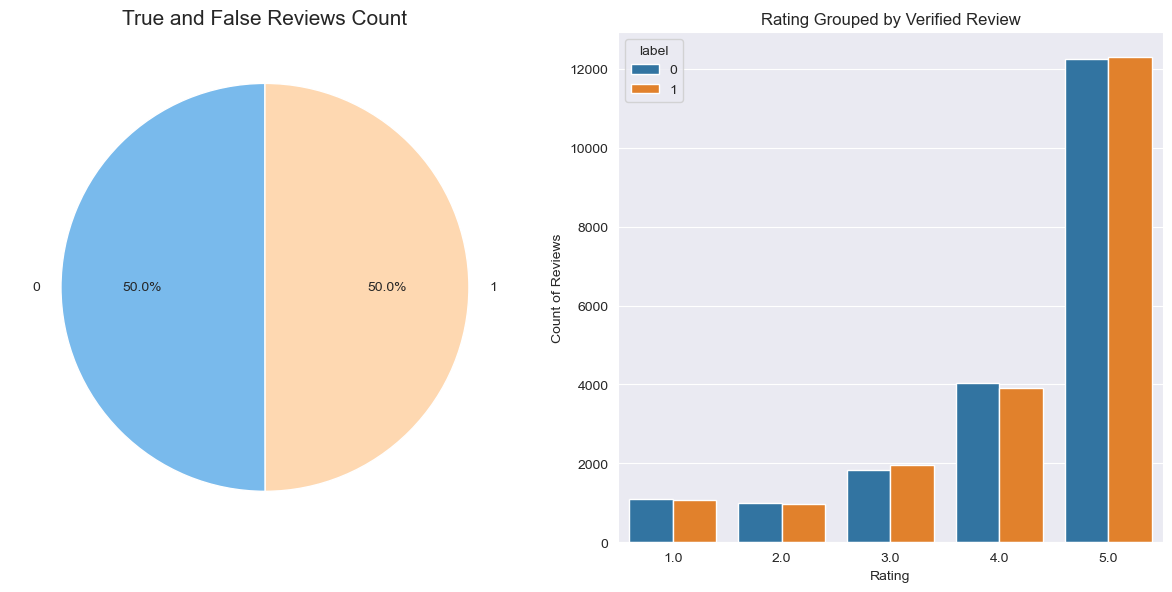

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First dashboard: Pie chart
colors = ['#79BAEC', '#FED8B1']
label = fake_reviews_df['label'].value_counts()
ax[0].pie(label.values, colors=colors, labels=label.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('True and False Reviews Count', fontsize=15)

# Second dashboard: Bar plot
sns.countplot(x='rating', hue='label', data=fake_reviews_df, ax=ax[1])
ax[1].set_xlabel("Rating")
ax[1].set_ylabel("Count of Reviews")
ax[1].set_title("Rating Grouped by Verified Review")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Count of Product Categories')

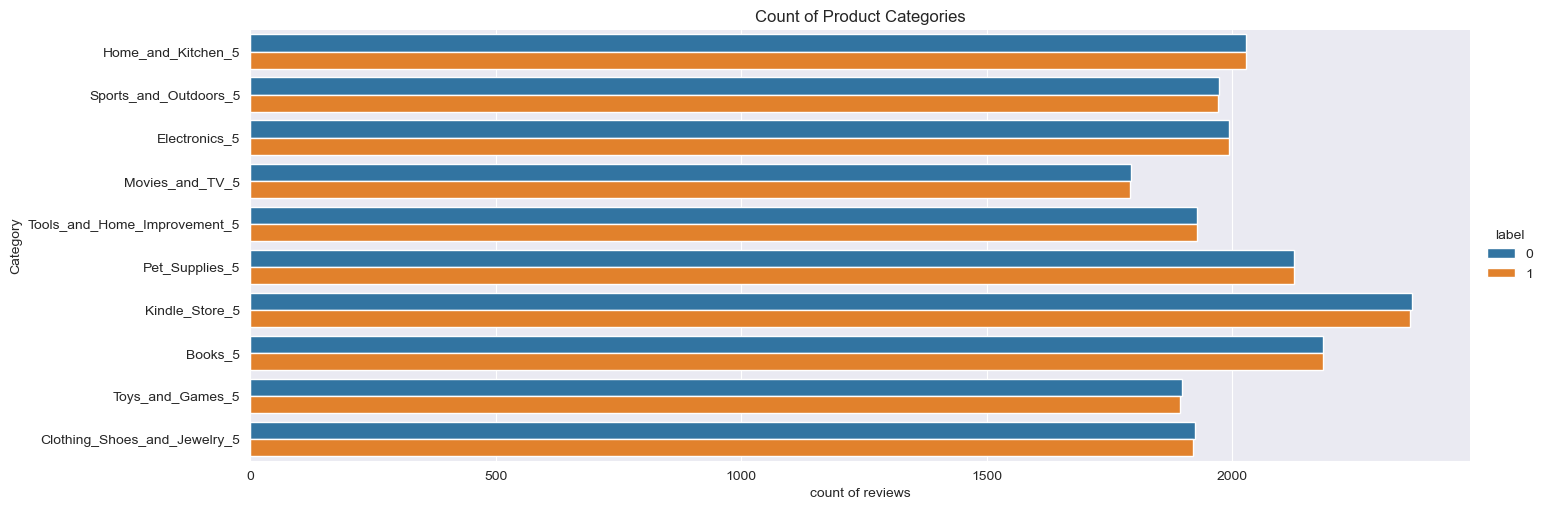

In [34]:
sns.catplot(y ='category',kind="count", hue = "label", data=fake_reviews_df,  height=5, aspect=3)
plt.ylabel("Category")
plt.xlabel("count of reviews")
plt.title("Count of Product Categories")

REVIEW TEXT EDA

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_88033/3188311113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vprt["text"] = vprt["text"].astype(str)
/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_88033/3188311113.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Labels",


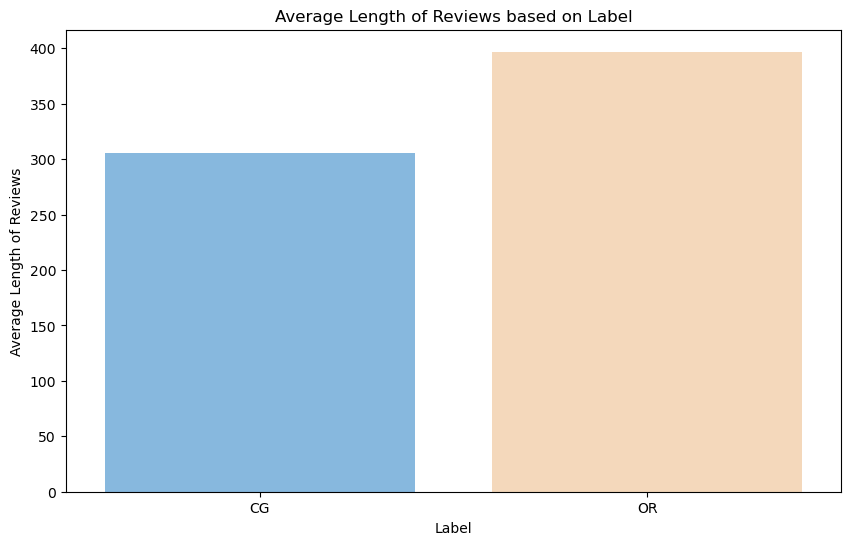

In [37]:
cols = ["label","text"]
vprt = fake_reviews_df[cols]

# Convert Review column to string type
vprt["text"] = vprt["text"].astype(str)

# Filter based on 1 and 0 labels
filtered_1 = vprt[vprt["label"] == 1]
filtered_0 = vprt[vprt["label"] == 0]

# Calculate average lengths
label_0_average_length = filtered_0["text"].apply(len).mean()
label_1_average_length = filtered_1["text"].apply(len).mean()

# Create DataFrame for plotting
data = pd.DataFrame({
    "Labels": ["CG", "OR"],
    "Average Length of Reviews": [label_1_average_length, label_0_average_length]
})

# Create the plot
plt.figure(figsize=(10, 6))
colors = ['#79BAEC', '#FED8B1']  # Light blue and light orange

# Create bar plot
sns.barplot(x="Labels", 
            y="Average Length of Reviews", 
            data=data, 
            palette=colors)

# Customize the plot
plt.xlabel("Label")
plt.ylabel("Average Length of Reviews")
plt.title("Average Length of Reviews based on Label")

# Display the plot
plt.show()

## YELP DATASET

In [4]:
yelp_df.rename(columns={'Spam(1) and Not Spam(0)': 'label'}, inplace=True)

In [5]:
yelp_df.head()

,User_id,Product_id,Rating,Date,Review,label,Sentiment,Features
0,923,0,3,2014-01-30,The food at snack is a selection of popular Gr...,1,Positive,"['appetizer tray', 'greek salad', 'main courses']"
1,924,0,3,2011-05-05,This little place in Soho is wonderful. I had ...,1,Positive,"['little place', 'soho', 'lamb sandwich', 'soh..."
2,925,0,4,2011-12-30,ordered lunch for 15 from Snack last Friday. Ã...,1,Positive,"['snack', 'regular company lunch list']"
3,926,0,4,2012-10-04,This is a beautiful quaint little restaurant o...,1,Positive,"['beautiful quaint', 'pretty street', 'great p..."
4,927,0,4,2014-02-06,Snack is great place for a Ã‚Â casual sit down...,1,Positive,"['snack', 'great place', 'Ã¢ casual', 'cold wi..."


In [43]:
yelp_df.isnull().sum()

User_id                    0
Product_id                 0
Rating                     0
Date                       0
Review                     0
Spam(1) and Not Spam(0)    0
Sentiment                  0
Features                   0
dtype: int64

In [44]:
yelp_df.duplicated().sum()

np.int64(0)

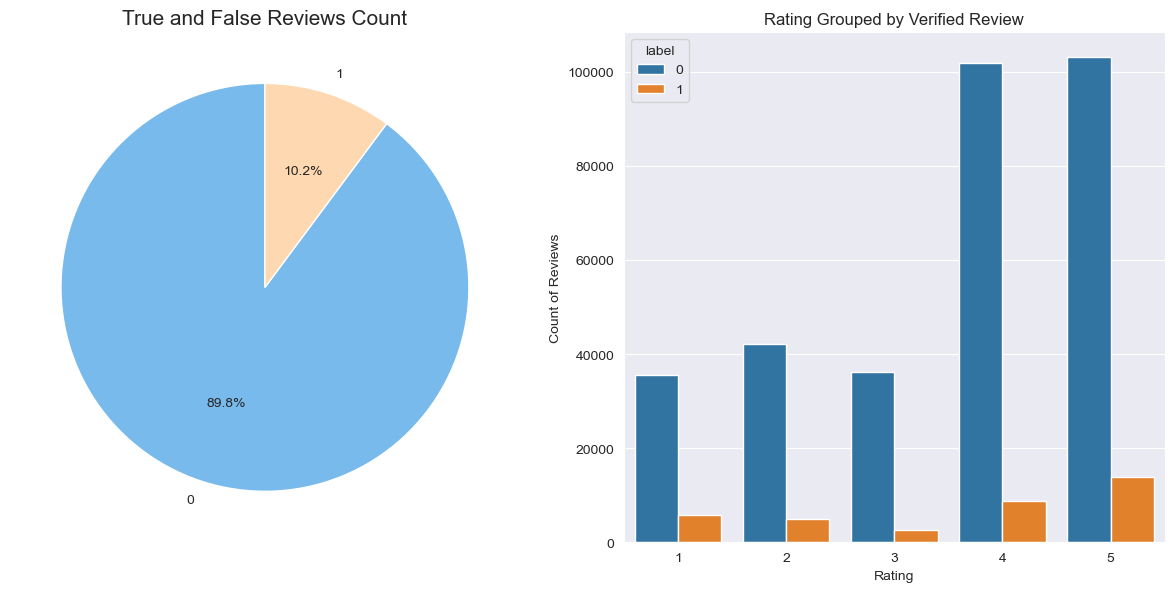

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First dashboard: Pie chart
colors = ['#79BAEC', '#FED8B1']
label = yelp_df['label'].value_counts()
ax[0].pie(label.values, colors=colors, labels=label.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('True and False Reviews Count', fontsize=15)

# Second dashboard: Bar plot
sns.countplot(x='Rating', hue='label', data=yelp_df, ax=ax[1])
ax[1].set_xlabel("Rating")
ax[1].set_ylabel("Count of Reviews")
ax[1].set_title("Rating Grouped by Verified Review")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Count of Sentiment Categories')

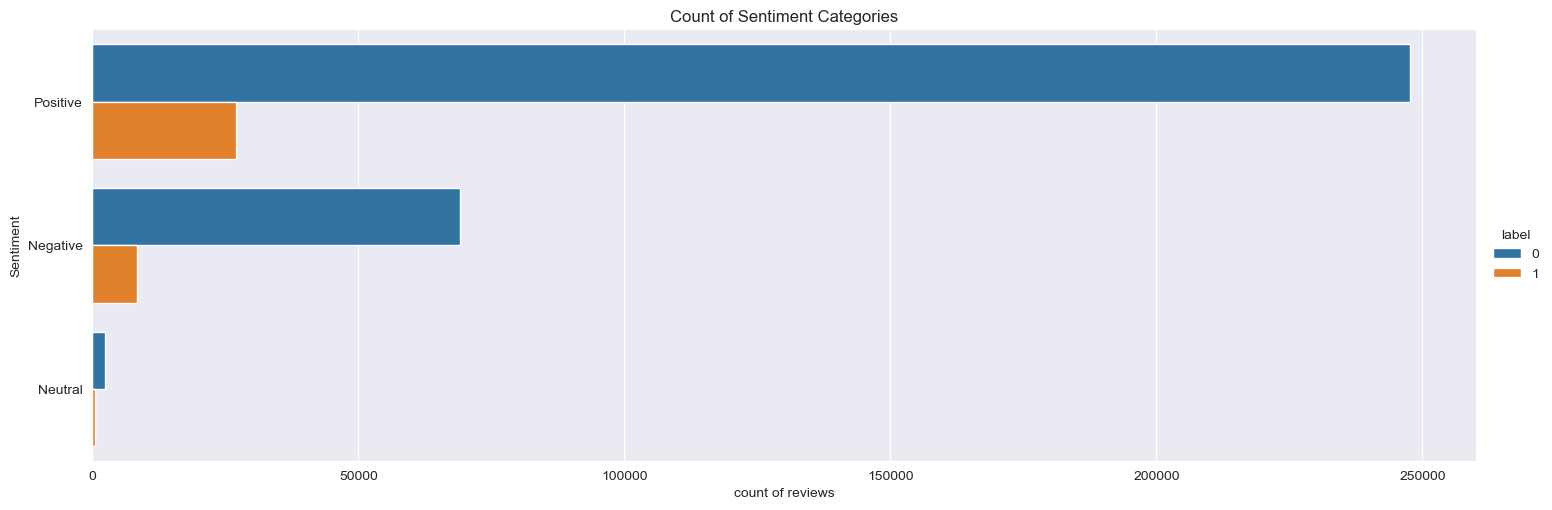

In [49]:
sns.catplot(y ='Sentiment',kind="count", hue = "label", data=yelp_df,  height=5, aspect=3)
plt.ylabel("Sentiment")
plt.xlabel("count of reviews")
plt.title("Count of Sentiment Categories")

In [15]:
yelp_df.head()

,User_id,Product_id,Rating,Date,Review,label,Sentiment,Features
0,923,0,3,2014-01-30,The food at snack is a selection of popular Gr...,1,Positive,"['appetizer tray', 'greek salad', 'main courses']"
1,924,0,3,2011-05-05,This little place in Soho is wonderful. I had ...,1,Positive,"['little place', 'soho', 'lamb sandwich', 'soh..."
2,925,0,4,2011-12-30,ordered lunch for 15 from Snack last Friday. Ã...,1,Positive,"['snack', 'regular company lunch list']"
3,926,0,4,2012-10-04,This is a beautiful quaint little restaurant o...,1,Positive,"['beautiful quaint', 'pretty street', 'great p..."
4,927,0,4,2014-02-06,Snack is great place for a Ã‚Â casual sit down...,1,Positive,"['snack', 'great place', 'Ã¢ casual', 'cold wi..."


/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_88033/2720809157.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vprt["Review"] = vprt["Review"].astype(str)
/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_88033/2720809157.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Labels",


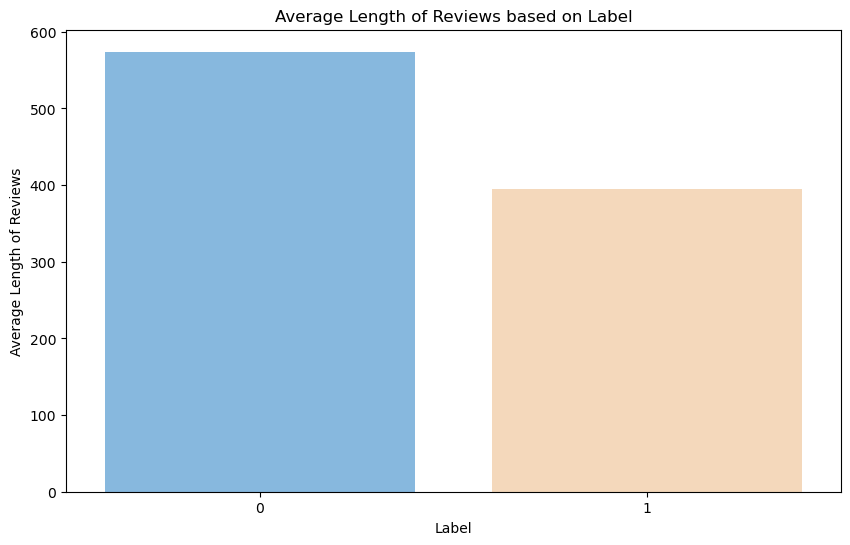

In [38]:
cols = ["label", "Review"]
vprt = yelp_df[cols]

# Convert Review column to string type
vprt["Review"] = vprt["Review"].astype(str)

# Filter based on 1 and 0 labels
filtered_1 = vprt[vprt["label"] == 1]
filtered_0 = vprt[vprt["label"] == 0]

# Calculate average lengths
label_0_average_length = filtered_0["Review"].apply(len).mean()
label_1_average_length = filtered_1["Review"].apply(len).mean()

# Create DataFrame for plotting
data = pd.DataFrame({
    "Labels": [1, 0],
    "Average Length of Reviews": [label_1_average_length, label_0_average_length]
})

# Create the plot
plt.figure(figsize=(10, 6))
colors = ['#79BAEC', '#FED8B1']  # Light blue and light orange

# Create bar plot
sns.barplot(x="Labels", 
            y="Average Length of Reviews", 
            data=data, 
            palette=colors)

# Customize the plot
plt.xlabel("Label")
plt.ylabel("Average Length of Reviews")
plt.title("Average Length of Reviews based on Label")

# Display the plot
plt.show()


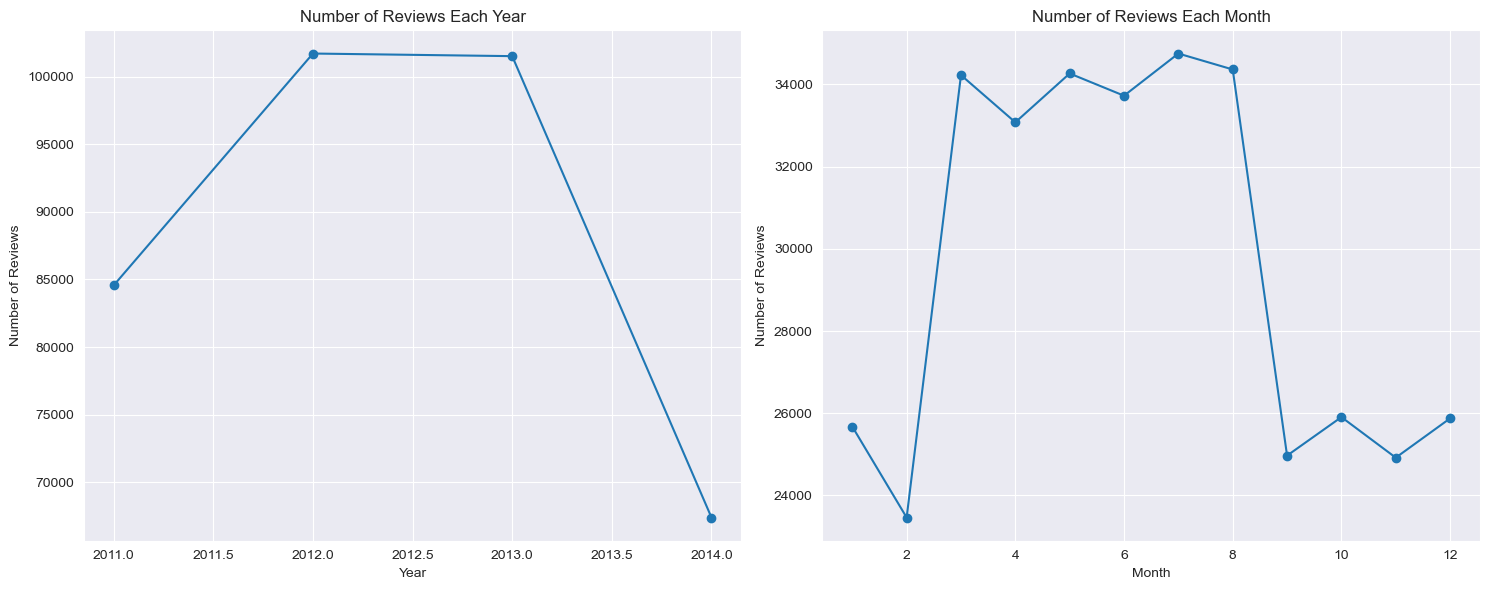

In [50]:
# Extract year and month from the Date column
yelp_df['Year'] = yelp_df['Date'].dt.year
yelp_df['Month'] = yelp_df['Date'].dt.month

# Group by year and month to get the count of reviews
reviews_per_year = yelp_df.groupby('Year').size()
reviews_per_month = yelp_df.groupby('Month').size()

# Plotting the graphs
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Line graph for number of reviews each year
ax[0].plot(reviews_per_year.index, reviews_per_year.values, marker='o')
ax[0].set_title('Number of Reviews Each Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Reviews')

# Line graph for number of reviews each month
ax[1].plot(reviews_per_month.index, reviews_per_month.values, marker='o')
ax[1].set_title('Number of Reviews Each Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()